In [1]:
# Necessary code for Matplotlib style
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Import dependencies
import numpy as np
import pandas as pd
from datetime import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.inspection import inspect

In [4]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Show columns in Measurements table
mcolumns = inspect(engine).get_columns('measurement')
mcounter = 0
for column in mcolumns:
    mcounter = mcounter + 1
    print(f'Column {mcounter}: {column["name"]}')

Column 1: id
Column 2: station
Column 3: date
Column 4: prcp
Column 5: tobs


In [10]:
# Show columns in Stations table
scolumns = inspect(engine).get_columns('station')
scounter = 0
for column in scolumns:
    scounter = scounter + 1
    print(f'Column {scounter}: {column["name"]}')

Column 1: id
Column 2: station
Column 3: name
Column 4: latitude
Column 5: longitude
Column 6: elevation


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
dates = session.query(measurements).order_by(measurements.date.desc())
mostrecent = dates.first()
print(f'Most recent date: {mostrecent.date}')

Most recent date: 2017-08-23


In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
date0 = dt.strptime(mostrecent.date, '%Y-%m-%d')

# Calculate the date one year from the last date in
yearago = date0.year - 1
date1 = f'{yearago}-{date0.month}-{date0.day}'
date1 = pd.to_datetime(date1, format='%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
precdates = session.query(measurements.date, measurements.prcp).\
    filter(measurements.date > date1.strftime('%Y-%m-%d')).\
    order_by(measurements.date).statement

# Save the query results as a Pandas DataFrame
prec_df = pd.read_sql_query(precdates, session.bind)
prec_df = prec_df.dropna()

#Get dates for plotting
pdates = prec_df['date'].to_list()

#Format and set index to date column
prec_df = prec_df.rename(columns={'date': 'Date', 'prcp': 'Precipitation (Inches)'})
prec_df = prec_df.set_index('Date')
prec_df.head()

,Precipitation (Inches)
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


In [40]:
# Get ticks and labels for plotting using the dates
labels = []
for date in pdates:
    getdate = pd.to_datetime(date, format='%Y-%m-%d')
    label = f'{getdate.month}/{getdate.year}'
    if label not in labels:
        labels.append(label)

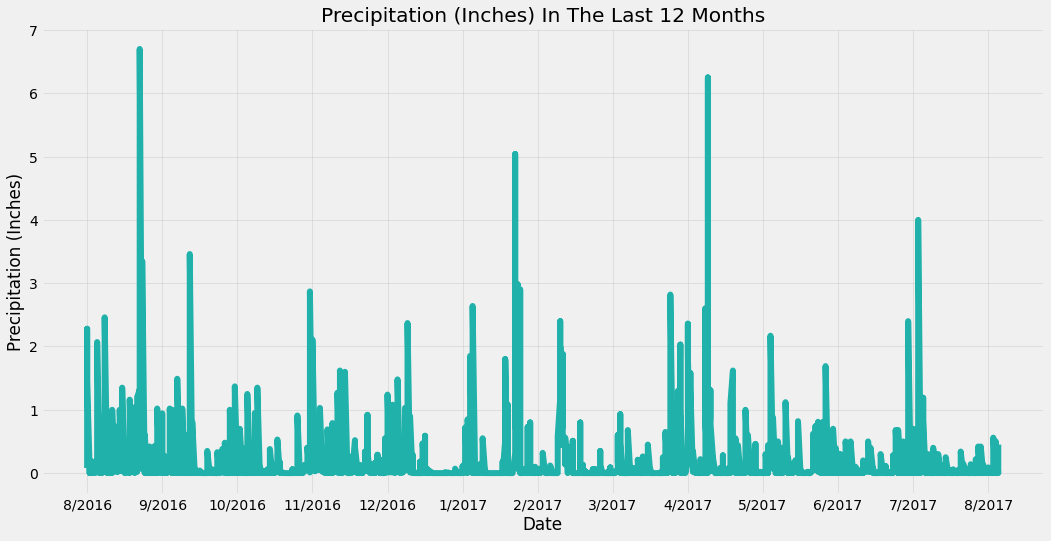

In [85]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = pdates                              
y_axis = prec_df['Precipitation (Inches)'].to_list()
plt.figure(figsize=(16,8))
plt.plot(x_axis,y_axis, color='lightseagreen',linewidth=6, markersize=12)
plt.grid(which='major',alpha=0.5)
plt.xticks(np.arange(0, 366, step=30),labels=labels,rotation = 0)
plt.title("Precipitation (Inches) In The Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.savefig('outputs/precipitation12months.png')
plt.show()

In [86]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe()

,Precipitation (Inches)
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [87]:
# Use Pandas to calcualte the summary statistics for the precipitation data, grouping by year
precgroup_df = pd.read_sql_query(precdates, session.bind)
precgroup_df = precgroup_df.groupby(['date']).mean()
precgroup_df.describe()

,prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()